### As a linguistic book editor, this tool is to give me the first impressions of the new job.

In [1]:
import random

#upload new book here
text = "sources/rur.txt"
text_cs = "sources/rur_cs.txt" 

with open(text, "r", encoding='utf-8') as text:
    content = text.read()
    
with open(text_cs, "r", encoding='utf-8') as text_cs:
    content_cs = text_cs.read()

#print random middle part of the book and translation
random_words = random.randint(round(len(content)/4), round(len(content) - len(content)/4))
random_words_cs = random.randint(round(len(content_cs)/4), round(len(content_cs) - len(content_cs)/4)) 

print("SOME RANDOM PART OF THE BOOK\n")
print(content[random_words:random_words+600])

print("\nSOME RANDOM PART OF THE TRANSLATION\n")
print(content_cs[random_words_cs:random_words_cs+600])

SOME RANDOM PART OF THE BOOK

it? I say. (_Turns to GALL._)

DR. GALL. Well?

DOMIN. I’d like to know what will become of us in the next ten minutes.
They’ve got us in a vise. We’re done for, Gall.

DR. GALL. You know, we made one serious mistake.

DOMIN. What?

DR. GALL. We made the Robots’ faces too much alike. A hundred thousand
faces all alike, all facing this way. A hundred thousand expressionless
bubbles. It’s like a nightmare.

DOMIN. You think if they’d been different--

DR. GALL. It wouldn’t have been such an awful sight!

DOMIN. (_Looks through binoculars towards the harbor_) I’d like to know
what they’re unloadi

SOME RANDOM PART OF THE TRANSLATION

 ty, kdo bloudí; znič jejich dílo a dopomoz lidem, aby se
    vrátili k starosti a práci; zadrž před zkázou pokolení lidské;
    nedopusť, aby vzali škody na duši a těle; zbav nás Robotů, a chraň
    paní Helenu, amen".

Helena: Alquiste, vy skutečně věříte?

Alquist: Nevím; nejsem si tím tak docela jist.

Helena: A přece se modl

### Getting some basic stats

In [2]:
length = round(len(content_cs)/1800)
rate_czk = 100

print('ESTIMATED NUMBER OF STANDARD PAGES - translation:')
print(length)
print('ESTIMATED COMPENSATION:')
print(str(length * rate_czk) + " CZK")

ESTIMATED NUMBER OF STANDARD PAGES - translation:
76
ESTIMATED COMPENSATION:
7600 CZK


### Getting better clue about the book

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt, seaborn as sns

#tokenizing text + removing stopwords + printing most common words
tokens = word_tokenize(content)
stops = stopwords.words('english')
clean_tokens = [token for token in tokens if token.lower() not in stops and token.isalnum()]
freq = FreqDist(clean_tokens)

print('SOME MOST COMMON WORDS FROM THE BOOK\n')
print(freq.most_common(30))

SOME MOST COMMON WORDS FROM THE BOOK

[('HELENA', 422), ('DOMIN', 360), ('Robots', 138), ('GALL', 120), ('HALLEMEIER', 99), ('FABRY', 97), ('ALQUIST', 97), ('Project', 85), ('us', 82), ('BUSMAN', 81), ('Glory', 80), ('Miss', 74), ('work', 64), ('Oh', 64), ('1', 64), ('like', 63), ('Yes', 59), ('know', 58), ('table', 53), ('NANA', 51), ('RADIUS', 51), ('must', 48), ('one', 47), ('Helena', 47), ('man', 42), ('works', 40), ('Rossum', 37), ('back', 37), ('Well', 36), ('see', 36)]


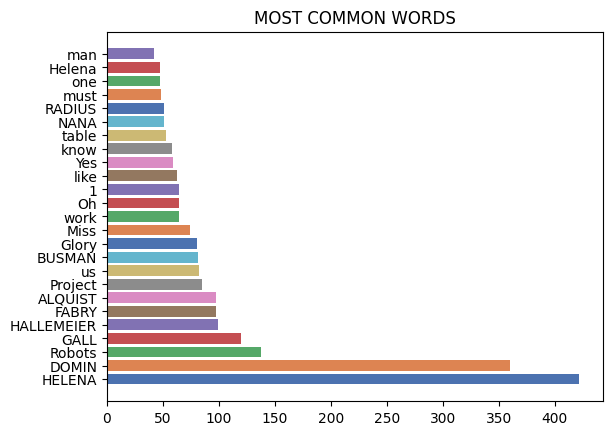

In [4]:
#plotting into bars
freq_dct_commons = dict(freq.most_common(25))

palette = sns.color_palette("deep")

plt.barh(list(freq_dct_commons.keys()), list(freq_dct_commons.values()), color=palette)
plt.title('MOST COMMON WORDS')
plt.show()

### Checking on my deadlines

In [5]:
import pandas as pd
from datetime import datetime, timedelta

schedule = pd.read_csv('sources/schedule.csv')

#defining steps
editing2 = schedule[schedule.Popis == "Finální redakce"]
proof = schedule[schedule.Popis == "Korektura 1"]

#date converter
def convert_date(step):
    start = step.iloc[0]['Od']
    end = step.iloc[0]['Do']
    start_formatted = datetime.strptime(start, "%d.%m.%Y").date()
    end_formatted = datetime.strptime(end, "%d.%m.%Y").date()
    return start_formatted, end_formatted

#counting days booked for given workflow without weekends
def count_weekdays(step):
    start, end = convert_date(step)
    days = (end - start).days
    weekdays = [day for day in range(days) if (start + timedelta(days=day)).weekday() < 5]
    return len(weekdays)

#counting average number of pages to do per day if I'm to meet deadlines
def pages_per_day(step):
    return round(length/count_weekdays(step), 2)
    
print(f'For second editing, you got {pages_per_day(editing2)} standard pages per day to edit.')
print(f'For proofreading, you got {pages_per_day(proof)} standard pages per day to read.')

For second editing, you got 2.53 standard pages per day to edit.
For proofreading, you got 3.62 standard pages per day to read.


#### I don't really care for standard pages - option to calculate Word or DTP pages manually:

In [6]:
def common_pages_day(total_pages, step):
    return round(float(total_pages)/count_weekdays(step), 2)

pages = common_pages_day(input('How many pages? '), editing2)
print(f'For second editing, you got {pages} Word pages per day to edit.')
pages_proof = common_pages_day(input('How many pages? '), proof)
print(f'For proofreading, you got {pages_proof} printed pages per day to read.')

How many pages?  564


For second editing, you got 18.8 Word pages per day to edit.


How many pages?  600


For proofreading, you got 28.57 printed pages per day to read.
